In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### F01
- 분류 : 데이터 전처리
- 요구사항명 : CSV 파일 읽기 및 필드 선택

In [11]:
df = pd.read_csv("./archive/NFLX.csv")
df = df[['Date','Open', 'High','Low', 'Close']] # 필요한 컬럼만 필터링한다
df.head()

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001


### F02
- 분류 : 데이터 전처리
- 요구사항명 : 날짜 필터링

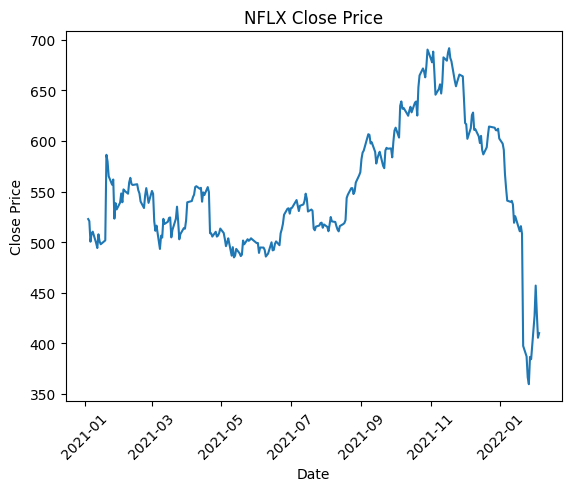

In [63]:
# datetime타입으로 변경
df['Date'] = pd.to_datetime(df['Date'])
# year추출
df['Year'] = df['Date'].dt.year

# 2021년 이후 데이터만 필터링
After2021 = df[df['Year'] >= 2021].reset_index(drop = True)

# 필터링한 데이터의 종가를 시각화한다
plt.plot(After2021['Date'], After2021['Close'])
plt.title('NFLX Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation = 45)

plt.show()

### F03
- 분류 : 데이터 분석
- 요구사항명 : 최고/최저 종가 추출

In [29]:
# max, min 메서드 활용
max_price = After2021['Close'].max()
min_price = After2021['Close'].min()

print("최고 종가:", max_price)
print("최저 종가:", min_price)

최고 종가: 691.690002
최저 종가: 359.700012


### F04
- 분류 : 데이터 분석 
- 요구사항명 : 월별 평균 종가 계산

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, '2021-01'),
  Text(1, 0, '2021-02'),
  Text(2, 0, '2021-03'),
  Text(3, 0, '2021-04'),
  Text(4, 0, '2021-05'),
  Text(5, 0, '2021-06'),
  Text(6, 0, '2021-07'),
  Text(7, 0, '2021-08'),
  Text(8, 0, '2021-09'),
  Text(9, 0, '2021-10'),
  Text(10, 0, '2021-11'),
  Text(11, 0, '2021-12'),
  Text(12, 0, '2022-01'),
  Text(13, 0, '2022-02')])

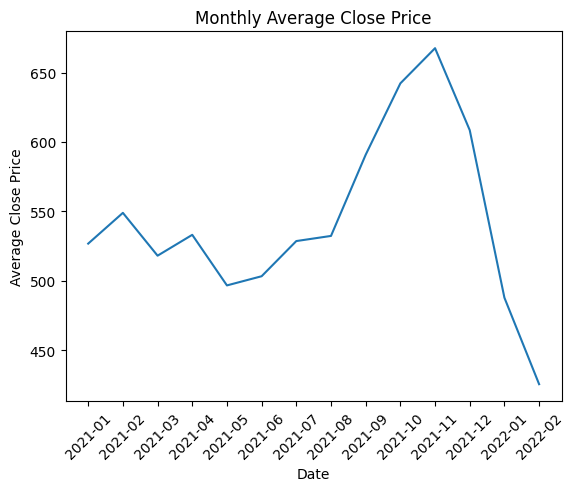

In [70]:
# Datetime을 월단위로 변환해서 년월 로 그룹바이가 가능하게 해줌
After2021['Year_Month'] = After2021['Date'].dt.to_period('M').astype('str') # plot에는 데이터타입 period는 안되서 str로 변환

#그룹바이를 해주고 reset_index로 인덱스 초기화
YM_groupby_close = After2021.groupby('Year_Month')['Close'].mean()
YM_groupby_close = pd.DataFrame(YM_groupby_close).reset_index()

# 년월별 close추이 시각화
plt.plot(YM_groupby_close['Year_Month'], YM_groupby_close['Close'])

plt.title('Monthly Average Close Price')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.xticks(rotation = 45)

### F05
- 분류 : 데이터 시각화 
- 요구사항명 : 월별 최고/최저/종가 시각화

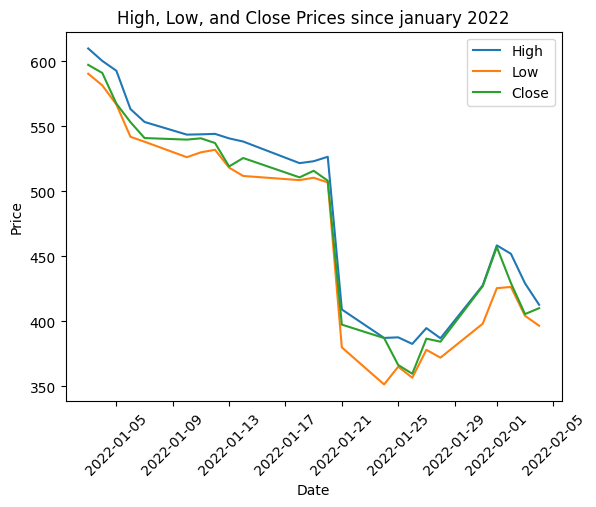

In [62]:
# 2021년 이후 데이터만 필터링
After2022 = df[df['Year'] >= 2022].reset_index(drop = True)

# High, Low, Close별로 시각화
plt.plot(After2022['Date'], After2022['High'], label = 'High')
plt.plot(After2022['Date'], After2022['Low'], label = 'Low')
plt.plot(After2022['Date'], After2022['Close'], label = 'Close')

plt.title('High, Low, and Close Prices since january 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation = 45) # x축 45도 틀어줌 
plt.legend()

### F06
- 분류 : 생성형 AI
- 요구사항명 : 주가 예측 프롬프트 작성

### 일별 변동성 추이 분석
- (High - Low) / Close로 변동성 계산
- 년월별, 월별 각각 변동성 시각화

가장 불안정한 년월:  2020-03
가장 불안정한 월:  3


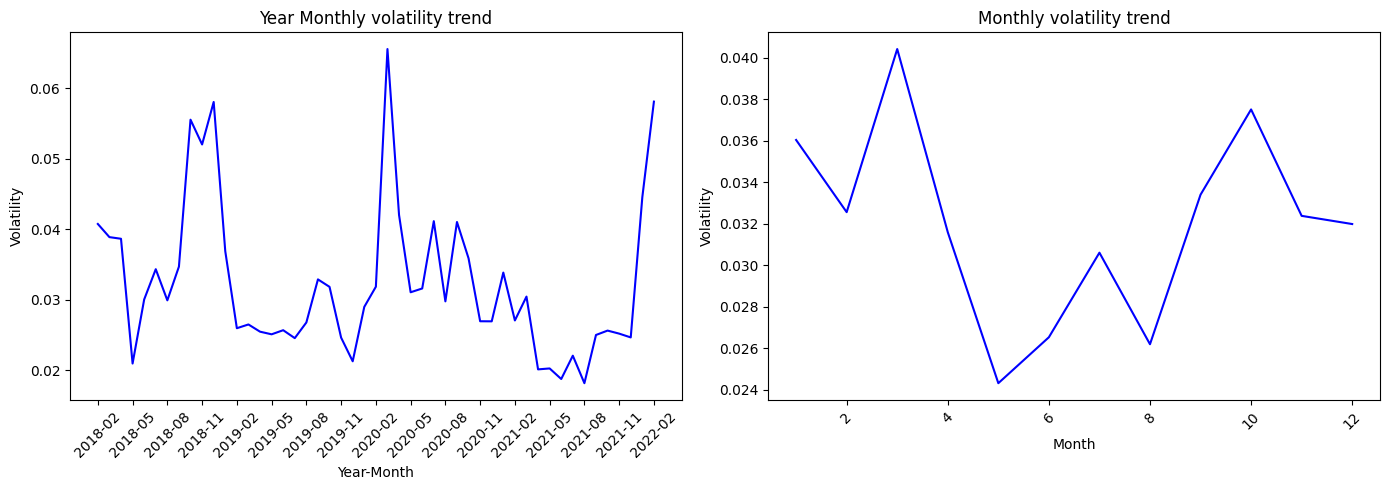

In [110]:
# 변동성 분석
# (High - Low) / Close 로 일별 변동성 계산
df['Volatility'] = (df['High'] - df['Low']) / df['Close']

# 월별 변동성 추이 -> 가장 불안정 시기 파악
df['Year_Month'] = df['Date'].dt.strftime("%Y-%m")
Vol_df = df.groupby('Year_Month')['Volatility'].mean().reset_index()

df['Month'] = df['Date'].dt.month
vol_month_df = df.groupby('Month')['Volatility'].mean().reset_index()

print("가장 불안정한 년월: ", Vol_df['Year_Month'][Vol_df['Volatility'].idxmax()])
print("가장 불안정한 월: ", vol_month_df['Month'][vol_month_df['Volatility'].idxmax()])

# plt.plot(Vol_df['Year_Month'], Vol_df['Volatility'])
# plt.xticks(range(0, len(Vol_df), 3), Vol_df['Year_Month'][::3], rotation=45)
# plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1행 2열, 가로 2개

# 년도 월 별 변동성 추이
axes[0].plot(Vol_df['Year_Month'], Vol_df['Volatility'], color='blue')
axes[0].set_title('Year Monthly volatility trend')
axes[0].set_xlabel('Year-Month')
axes[0].set_ylabel('Volatility')
axes[0].set_xticks(range(0, len(Vol_df), 3))
axes[0].set_xticklabels(Vol_df['Year_Month'][::3], rotation=45)

# 월별 변동성 추이
axes[1].plot(vol_month_df['Month'], vol_month_df['Volatility'], color='blue')
axes[1].set_title('Monthly volatility trend')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Volatility')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()  # 그래프 사이 간격 자동 조정
plt.show()

### 질문 프롬프트 : 
2018년도 2월부터 2022년도 2월까지 넷플릭스의 주가 일별 변동성을 (High - Low) / Close 로 계산하여 그래프를 그려봤어. 가장 불안정한 년월은 2020년 3월이고, 3월에 변동성이 가장 심한것으로 나와. 넷플릭스 주가는 지금 8월에 안전한 자산이라고 생각할 수 있을까? 그리고 넷플릭스의 이런 변동성의 주요 원인은 무엇인지 설명해줘

### 답변 프롬프트 :
✅ 1️⃣ 넷플릭스 주가는 8월에 “안전한 자산”일까?
결론부터 말하면, “안전한 자산”이라고 보기 어렵습니다.

주식(특히 넷플릭스 같은 성장주) 는 본질적으로 변동성이 크고, 시장 전반적인 상황에 따라 크게 출렁입니다.

2020년 3월 코로나19 팬데믹 초기처럼 외부 충격(거시경제 이벤트) 이 발생하면 변동성이 급등하는 패턴을 보여줍니다.

8월에 상대적으로 변동성이 낮다고 해도, 이는 “계절적 안정”일 뿐, 리스크가 없는 ‘안전자산(safe haven)’이란 의미는 아님.

📌 안전자산 예시: 미국 국채(Treasury), 금(Gold), 엔화(JPY)
📌 넷플릭스 주식: “성장성 있는 엔터테인먼트 테크 기업의 주식” → 투자자산이지 안전자산은 아님

✅ 2️⃣ 넷플릭스 변동성이 높아진 주요 원인
📆 그래프에서 2020년 3월이 가장 변동성이 컸던 이유 → 코로나19 팬데믹 시작

2020년 3월: 전 세계 증시 폭락 (S&P500 한 달에 -30%)

넷플릭스는 코로나19 수혜주였지만, 초기엔 시장 전체가 급락 → 넷플릭스도 단기적으로 급등락을 반복

📌 넷플릭스 주가 변동성을 만든 주요 요인들
1️⃣ 글로벌 거시경제 이벤트

코로나19, 금리 인상/인하, 경기침체 우려 등

2️⃣ 구독자 증가/감소 뉴스

넷플릭스는 분기 실적 발표 때 구독자 수(Subscriber Growth) 가 핵심 지표
→ 예상보다 적으면 주가 급락, 많으면 급등

3️⃣ 콘텐츠 투자 및 성공/실패

<오징어 게임>, <기묘한 이야기> 같은 히트작 → 주가 급등

반대로 대형 콘텐츠 투자 실패 뉴스 → 주가 급락

4️⃣ 스트리밍 경쟁 심화

디즈니+(Disney+), HBO Max, 애플TV+ 등 경쟁 플랫폼 등장
→ “넷플릭스의 독점 지위 약화” 우려 → 변동성 증가

5️⃣ 정책 & 규제 이슈

콘텐츠 규제, 가격 인상, 광고 요금제 도입 소식도 변동성에 영향

✅ 정리
넷플릭스 주식 = 안정적인 ‘저변동성 자산’이 아님

주가 변동성이 크고, 거시경제 & 기업 뉴스에 민감

2020년 3월 변동성 급등 원인 = 코로나19 초기 증시 폭락

주요 변동성 원인

거시경제 이벤트 (팬데믹, 금리 변화)

구독자 수 증감 뉴스

대형 콘텐츠 흥행/실패

경쟁 심화 (디즈니+ 등)

가격·정책 변화

